In [1]:
%matplotlib inline

from pathlib import Path
import random

import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

import matplotlib.pylab as plt

In [4]:
session_times=pd.read_csv('web_page_data.csv')


In [7]:
session_times['Time']=100*session_times['Time']

In [8]:
session_times

,Page,Time
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0
5,Page B,85.0
6,Page A,211.0
7,Page B,246.0
8,Page A,132.0
9,Page B,149.0


# Visualization(웹페이지 체류시간)

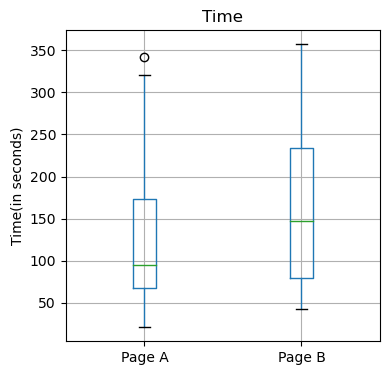

In [10]:
ax=session_times.boxplot(by='Page', column='Time', figsize=(4,4))

ax.set_xlabel('')
ax.set_ylabel('Time(in seconds)')
plt.suptitle('')

plt.tight_layout()
plt.show()

In [17]:
mean_a=session_times[session_times.Page=='Page A'].Time.mean()
mean_b=session_times[session_times.Page=='Page B'].Time.mean()
mean_b-mean_a

35.66666666666667

In [18]:
session_times[session_times.Page=='Page A'].Time.count()
session_times[session_times.Page=='Page B'].Time.count()

15

# Random Permutation Test

In [25]:
#range n is sequence(pool), nB is number of sample to be retrived
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[list(idx_B)].mean() - x.loc[list(idx_A)].mean()
    
nA = session_times[session_times.Page == 'Page A'].shape[0]
nB = session_times[session_times.Page == 'Page B'].shape[0]
print(perm_fun(session_times.Time, nA, nB))

57.95238095238095


In [27]:
random.seed(1)
perm_diffs=[perm_fun(session_times.Time, nA, nB)for _ in range(1000)]

perm_diffs

[6.523809523809518,
 -17.59047619047618,
 22.866666666666674,
 -6.161904761904765,
 10.29523809523809,
 -9.019047619047626,
 5.838095238095235,
 -49.019047619047626,
 -7.6476190476190595,
 -14.733333333333348,
 -38.161904761904765,
 -19.876190476190487,
 53.26666666666668,
 39.55238095238097,
 -30.276190476190465,
 -39.076190476190476,
 -6.161904761904765,
 48.809523809523796,
 -49.81904761904762,
 25.609523809523807,
 -74.27619047619048,
 14.180952380952391,
 -65.59047619047618,
 -23.19047619047619,
 -17.70476190476191,
 55.89523809523811,
 42.98095238095239,
 15.666666666666686,
 6.980952380952402,
 -33.47619047619047,
 25.038095238095252,
 -13.819047619047637,
 1.3809523809523796,
 5.838095238095235,
 -46.27619047619048,
 -42.04761904761905,
 -13.933333333333337,
 -9.70476190476191,
 10.752380952380946,
 48.12380952380954,
 22.40952380952382,
 -11.533333333333331,
 16.695238095238096,
 -6.161904761904765,
 2.2952380952380906,
 20.46666666666667,
 -21.361904761904782,
 30.18095238095

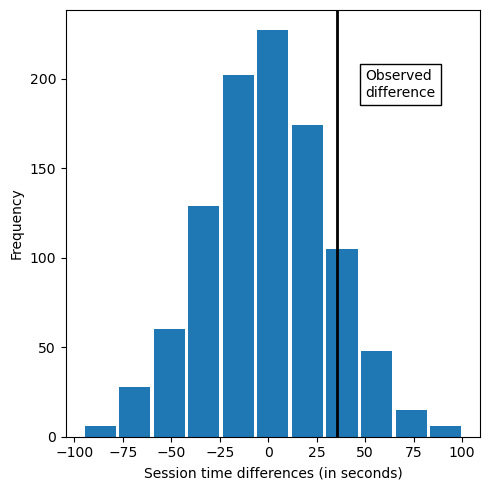

In [35]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = mean_b - mean_a, color='black', lw=2)
ax.text(50, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [36]:
np.mean(np.array(perm_diffs)>mean_b-mean_a)

0.121

#difference between Page A and Page B is within frequency distribution so statistically insignificant, meaning effect of two differnt page is not significant
#if it is less than 5% than is is out of range thus statistically significant


# Coversion rate test(구매율테스트)

               priceA priceB
    converged  200    182
not converged  23539  22406

#가격A 가격B에 비해 5% 우수한 결과
#0.8425=200/(23539＋200)*100
#0.8057%=182/(22406＋182)*100
#0.0368%p개선
#통계적 유의성 검정이 필요 없다고 생각할지 모르겠지만 전환율이 너무 낮아*1%미만 검증이 필요함
#재표본추출을 통해 이 차이가 우연에 의한 것인지 판단 가능*분포 내에 있으면 우연에 인한 것이므로
#통계적으로 무의미함


In [38]:
random.seed(1)
obs_pct_diff = 100 * (200 / 23739 - 182 / 22588)
print(f'Observed difference: {obs_pct_diff:.4f}%')

Observed difference: 0.0368%


In [39]:
conversion=[0]*45945
conversion.extend([1]*382)
conversion=pd.Series(conversion)

conversion

0        0
1        0
2        0
3        0
4        0
        ..
46322    1
46323    1
46324    1
46325    1
46326    1
Length: 46327, dtype: int64

In [40]:
perm_diffs=[100*perm_fun(conversion,23739,22588) for _ in range(1000)]
perm_diffs

[-0.06267673224219054,
 -0.019478698206194106,
 0.023719335829802332,
 0.17923225835938977,
 -0.02811830501339343,
 -0.22682926157897723,
 -0.06267673224219054,
 -0.0453975186277919,
 -0.12315397989258554,
 0.023719335829802332,
 -0.019478698206194106,
 -0.07131633904938986,
 -0.019478698206194106,
 -0.0021994845917954614,
 0.006440122215403861,
 0.11011540390179539,
 0.13603422432339335,
 0.015079729022603183,
 0.13603422432339335,
 0.0496381562514003,
 -0.05403712543499122,
 -0.010839091398994784,
 -0.010839091398994784,
 -0.12315397989258554,
 0.015079729022603183,
 0.07555697667299827,
 -0.1404331935069842,
 -0.010839091398994784,
 -0.05403712543499122,
 -0.10587476627818707,
 -0.0021994845917954614,
 0.04099854944420098,
 0.006440122215403861,
 0.0841965834801976,
 0.0841965834801976,
 0.006440122215403861,
 -0.0021994845917954614,
 0.10147579709459614,
 -0.019478698206194106,
 -0.1836312275429806,
 0.032358942637001654,
 -0.03675791182059275,
 -0.05403712543499122,
 -0.0453975186

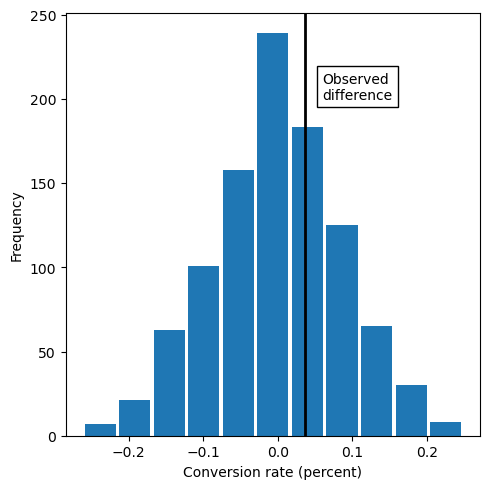

In [41]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=obs_pct_diff, color='black', lw=2)
ax.text(0.06, 200, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Observed difference is within frequency distribution, thus statistically insignificant(meaning effect of different price is not significant(can happen randomly)

# P-Value

If np.mean is applied to a list of booleans, it gives the percentage of how often True was found in the list (#True*significant / #Total).

In [42]:
print(np.mean([diff > obs_pct_diff for diff in perm_diffs]))

0.332


In [43]:
survivors = np.array([[200, 23739 - 200], [182, 22588 - 182]])
chi2, p_value, df, _ = stats.chi2_contingency(survivors)

print(f'p-value for single sided test: {p_value / 2:.4f}')

p-value for single sided test: 0.3498


# T-Test

In [44]:
res = stats.ttest_ind(session_times[session_times.Page == 'Page A'].Time, 
                      session_times[session_times.Page == 'Page B'].Time,
                      equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

p-value for single sided test: 0.1408


In [45]:
tstat, pvalue, df = sm.stats.ttest_ind(
    session_times[session_times.Page == 'Page A'].Time, 
    session_times[session_times.Page == 'Page B'].Time,
    usevar='unequal', alternative='smaller')
print(f'p-value: {pvalue:.4f}')

p-value: 0.1408


Alternative Hypothesis: Session time for A is shoter(different) than that of B
since P-value is bigger than 0.05 we fail to reject null hypothesis,
meanint session time for A and B is not significantly different.

# Analysis of Variance(ANOVA)

In [46]:
four_sessions=pd.read_csv('four_sessions.csv')

In [47]:
four_sessions

,Page,Time
0,Page 1,164
1,Page 2,178
2,Page 3,175
3,Page 4,155
4,Page 1,172
5,Page 2,191
6,Page 3,193
7,Page 4,166
8,Page 1,177
9,Page 2,182


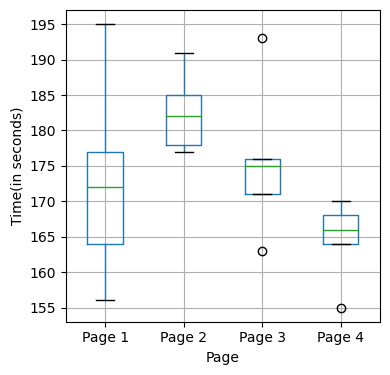

In [52]:
ax = four_sessions.boxplot(by='Page', column='Time',figsize=(4,4))
ax.set_xlabel('Page')
ax.set_ylabel('Time(in seconds)')
plt.suptitle('')
plt.title('')

plt.tight_layout()
plt.show()

In [56]:
observed_variance = four_sessions.groupby('Page').mean().var()[0]
print('Observed means:', four_sessions.groupby('Page').mean().values.ravel())
print('Variance:', observed_variance)
def perm_test(df):
    df=df.copy()
    df['Time']=np.random.permutation(df['Time'].values)
    return df.groupby('Page').mean().var()[0]

print(perm_test(four_sessions))

Observed means: [172.8 182.6 175.6 164.6]
Variance: 55.426666666666655
25.18666666666664


Pr(Prob) 0.08033333333333334


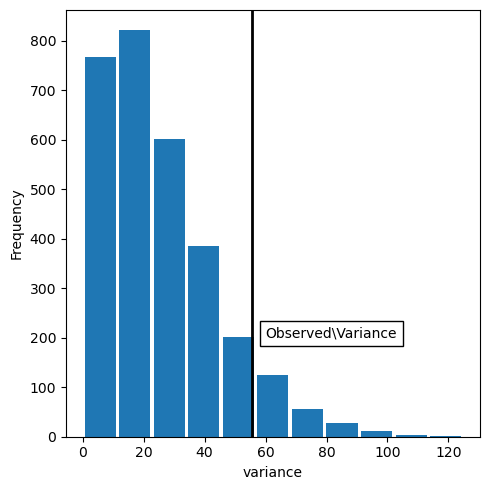

In [61]:
random.seed(1)
perm_variance=[perm_test(four_sessions)for _ in range (3000)]
print('Pr(Prob)', np.mean([var>observed_variance for var in perm_variance]))

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_variance, bins=11, rwidth=0.9)
ax.axvline(x=observed_variance, color='black', lw=2)
ax.text(60,200, 'Observed\Variance', bbox={'facecolor':'white'})
ax.set_xlabel('variance')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Pr(Prob)의 값은 p-value이며 결과는 0.07입니다. 통상적인 임계 p-value 값인 0.05이상임으로 네 페이지간의 차이가 우연히 발생할 수 있다고 결론 내릴 수 있습니다.

# F-Statistics

we can compute an ANOVA table using statsmodel

In [62]:
model = smf.ols('Time ~ Page', data=four_sessions).fit()
                
aov_table = sm.stats.anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq         F    PR(>F)
Page       3.0   831.4  277.133333  2.739825  0.077586
Residual  16.0  1618.4  101.150000       NaN       NaN


In [63]:
res = stats.f_oneway(four_sessions[four_sessions.Page == 'Page 1'].Time, 
                     four_sessions[four_sessions.Page == 'Page 2'].Time,
                     four_sessions[four_sessions.Page == 'Page 3'].Time,
                     four_sessions[four_sessions.Page == 'Page 4'].Time)
print(f'F-Statistic: {res.statistic / 2:.4f}')
print(f'p-value: {res.pvalue / 2:.4f}')

F-Statistic: 1.3699
p-value: 0.0388


F-통계량을 사용한 방법은 p-value 값이 더 적게나와 임계값인 0.05 이하입니다. 그러나 ANOVA 분석의 p-value가 낮게 나왔다고 해서 모든 그룹에서 통계적으로 차이가 있다고 할 수는 없습니다. 추가적인 Ad hoc 분석을 진행해 어떤 그룹에서 차이가 있는지 확인해보아야 합니다.

# Chi-Square Test

In [64]:
click_rate=pd.read_csv('click_rates.csv')
click_rate

,Headline,Click,Rate
0,Headline A,Click,14
1,Headline A,No-click,986
2,Headline B,Click,8
3,Headline B,No-click,992
4,Headline C,Click,12
5,Headline C,No-click,988


In [66]:
clicks=click_rate.pivot(index='Click',columns='Headline',values='Rate')
clicks

Headline,Headline A,Headline B,Headline C
Click,,,
Click,14,8,12
No-click,986,992,988


In [68]:
row_average=clicks.mean(axis=1)
pd.DataFrame({'Head A':row_average,
             'Head B': row_average,
              'Head C':row_average,})

,Head A,Head B,Head C
Click,,,
Click,11.333333,11.333333,11.333333
No-click,988.666667,988.666667,988.666667


In [69]:
box=[1]*34
box.extend([0]*2966)
random.shuffle(box)

def chi2(observed, expected):
    pearson_residuals=[]
    for row, expect in zip(observed, expected):
        pearson_residuals.append([(observe-expect)**2/expect
                                 for observe in row])
    return np.sum(pearson_residuals)

expected_clicks = 34 / 3
expected_noclicks = 1000 - expected_clicks
expected = [34 / 3, 1000 - 34 / 3]
chi2observed = chi2(clicks.values, expected)

def perm_fun(box):
    sample_clicks = [sum(random.sample(box, 1000)),
                     sum(random.sample(box, 1000)),
                     sum(random.sample(box, 1000))]
    sample_noclicks = [1000 - n for n in sample_clicks]
    return chi2([sample_clicks, sample_noclicks], expected)

perm_chi2 = [perm_fun(box) for _ in range(2000)]

resampled_p_value = sum(perm_chi2 > chi2observed) / len(perm_chi2)
print(f'Observed chi2: {chi2observed:.4f}')
print(f'Resampled p-value: {resampled_p_value:.4f}')

Observed chi2: 1.6659
Resampled p-value: 0.4820


In [77]:
chisq, pvalue, df, expected = stats.chi2_contingency(clicks)
print(f'Observed chi2: {chisq:.4f}')
print(f'p-value: {pvalue:.4f}')
print(f'df:{df}')

Observed chi2: 1.6659
p-value: 0.4348
df:2


P-value is over 0.05 thus fail to reject null hypothesis, meaning the difference is in significant
재표본추출을 통해 얻은 편차의 제곱합이 얼마나 자주 관측값*1.66 을 초과하는가 43프로이상 초과 하므로 관측값이 범위 안에 있음. 초과값이 5프로이하면 범위 밖으로 관측

# Figure chi-sq distribution

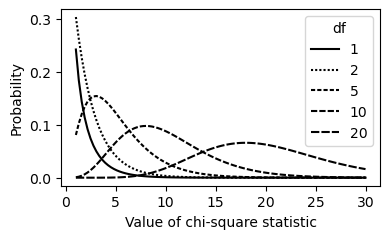

In [78]:
x = [1 + i * (30 - 1) / 99 for i in range(100)]

chi = pd.DataFrame({
    'x': x,
    'chi_1': stats.chi2.pdf(x, df=1),
    'chi_2': stats.chi2.pdf(x, df=2),
    'chi_5': stats.chi2.pdf(x, df=5),
    'chi_10': stats.chi2.pdf(x, df=10),
    'chi_20': stats.chi2.pdf(x, df=20),
})
fig, ax = plt.subplots(figsize=(4, 2.5))
ax.plot(chi.x, chi.chi_1, color='black', linestyle='-', label='1')
ax.plot(chi.x, chi.chi_2, color='black', linestyle=(0, (1, 1)), label='2')
ax.plot(chi.x, chi.chi_5, color='black', linestyle=(0, (2, 1)), label='5')
ax.plot(chi.x, chi.chi_10, color='black', linestyle=(0, (3, 1)), label='10')
ax.plot(chi.x, chi.chi_20, color='black', linestyle=(0, (4, 1)), label='20')
ax.legend(title='df')
ax.set_xlabel('Value of chi-square statistic')
ax.set_ylabel('Probability')

plt.tight_layout()
plt.show()